<a href="https://colab.research.google.com/github/pavlovado/TAOI/blob/main/associative_rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install apyori
from apyori import apriori as apr
import time as t
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tabulate import tabulate
from google.colab import drive

In [ ]:
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/baskets.csv'

with open(file_path, encoding='cp1251') as f:
    dataset = f.read().split('\n')

baskets = [s.split(',') for s in dataset]

print(baskets)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[['креветки', 'миндаль', 'авокадо', 'овощная смесь', 'зеленый виноград', 'цельнозерновая мука', 'батат', 'творог', 'энергетический напиток', 'томатный сок', 'низкокалорийный йогурт', 'зеленый чай', 'мед', 'салат', 'минеральная вода', 'лосось', 'ягодный сок', 'замороженный смузи', 'шпинат', 'оливковое масло'], ['гамбургер', 'фрикадельки', 'яйца'], ['чатни'], ['индейка', 'авокадо'], ['минеральная вода', 'молоко', 'энергетический батончик', 'рис', 'зеленый чай'], ['низкокалорийный йогурт'], ['цельнозерновые макароны', 'картофель-фри'], ['суп', 'низкокалорийный крем', 'лук-шалот'], ['замороженные овощи', 'макароны', 'зеленый чай'], ['картофель-фри'], ['яйца', 'корм для животных'], ['печенье'], ['индейка', 'гамбургер', 'минеральная вода', 'яйца', 'растительное масло'], ['макароны', 'шампанское', 'печенье'], ['минеральная вода', 'лосось'], ['минеральная вода'], ['к

Напишем функцию для отображения ассоциативных правил. Ассоциативные правила представляют собой механизм нахождения логических закономерностей между связанными элементами. Основная цель ассоциативных правил — выявить отношения типа "если ... то ..." между предметами, которые происходят вместе. В контексте данной работы: если покупатель покупает один товар, то с какой вероятностью он купит другой товар.

Сначала в консоли отображается минимальное значение достоверности, установленное пользователем, и общее количество ассоциативных правил, удовлетворяющих этому порогу.

Далее перебираются первые 20 правил. Для каждого правила извлекаются антецедент (товары, которые предшествуют покупке других товаров) и консеквент (товары, покупка которых следует за антецедентом). Также выводятся значения поддержки, показывающее, как часто данное сочетание встречается в транзакциях, и достоверности, отражающее вероятность того, что при покупке антецедента будет куплен и консеквент.

Все найденные правила форматируются в виде таблицы.

In [ ]:
def display_association_rules(association_rules, min_confidence_value):
    print(f"\nМинимальное значение достоверности {min_confidence_value}%: {len(association_rules)} ассоциативных правил")

    table_data = []
    for rule in association_rules[:20]:
        for ordered_stat in rule.ordered_statistics:
            antecedent = ', '.join(ordered_stat.items_base) if ordered_stat.items_base else "—"
            consequent = ', '.join(ordered_stat.items_add) if ordered_stat.items_add else "—"
            table_data.append([antecedent, consequent, rule.support, ordered_stat.confidence])

    print(tabulate(table_data, headers=["Антецедент", "Консеквент", "Поддержка", "Достоверность"], tablefmt="fancy_grid"))

Отфильтруем правила по количеству объектов.

Сначала определим фиксированное значение поддержки, равное 1%. Затем зададим диапазон значений достоверности от 20% до 65% с шагом 5%.

В цикле для каждого значения минимальной достоверности запускается алгоритм Apriori, который находит ассоциативные правила. Далее выполняется фильтрация правил с учетом ограничения на их длину: в них суммарное количество товаров в антецеденте и консеквенте не должно превышать 7.

После этого фиксируется время выполнения алгоритма, сохраняется количество отфильтрованных правил и сами правила.

Затем для каждого значения достоверности вызывается функция `display_association_rules`, которая выводит найденные правила в табличном формате.

In [ ]:
def filter_rules_by_length(rules, max_length=7):
    return [rule for rule in rules if any(len(ordered_stat.items_base) + len(ordered_stat.items_add) <= max_length for ordered_stat in rule.ordered_statistics)]

support = 0.01
confidences = range(20, 70, 5)
execution_times = []
rule_counts = []
association_rules = []

for min_conf in confidences:
    start_time = time.time()
    rules = apr(baskets, min_support=support, min_confidence=min_conf / 100)
    filtered_rules = filter_rules_by_length(list(rules))
    execution_duration = time.time() - start_time

    execution_times.append(execution_duration)
    rule_counts.append(len(filtered_rules))
    association_rules.append((min_conf, filtered_rules))

    display_association_rules(filtered_rules, min_conf)


Минимальное значение достоверности 20%: 126 ассоциативных правил
╒═════════════════╤══════════════════╤═════════════╤═════════════════╕
│ Антецедент      │ Консеквент       │   Поддержка │   Достоверность │
╞═════════════════╪══════════════════╪═════════════╪═════════════════╡
│ —               │ минеральная вода │   0.238336  │        0.238336 │
├─────────────────┼──────────────────┼─────────────┼─────────────────┤
│ авокадо         │ минеральная вода │   0.0115969 │        0.348    │
├─────────────────┼──────────────────┼─────────────┼─────────────────┤
│ блинчики        │ картофель-фри    │   0.020128  │        0.211781 │
├─────────────────┼──────────────────┼─────────────┼─────────────────┤
│ блинчики        │ макароны         │   0.0255932 │        0.269285 │
├─────────────────┼──────────────────┼─────────────┼─────────────────┤
│ блинчики        │ минеральная вода │   0.0337243 │        0.354839 │
├─────────────────┼──────────────────┼─────────────┼─────────────────┤
│ блинчики 

Вывыдем два графика для визуализации результатов поиска ассоциативных правил. Первый график показывает зависимость времени выполнения алгоритма от порога достоверности. Второй график отображает количество найденных ассоциативных правил при разных порогах достоверности.

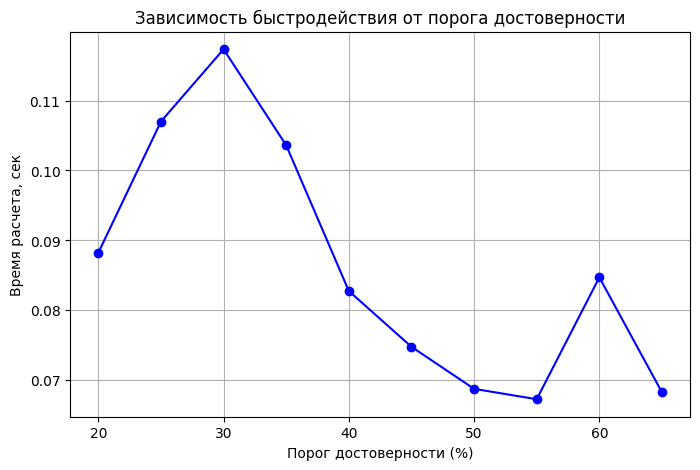

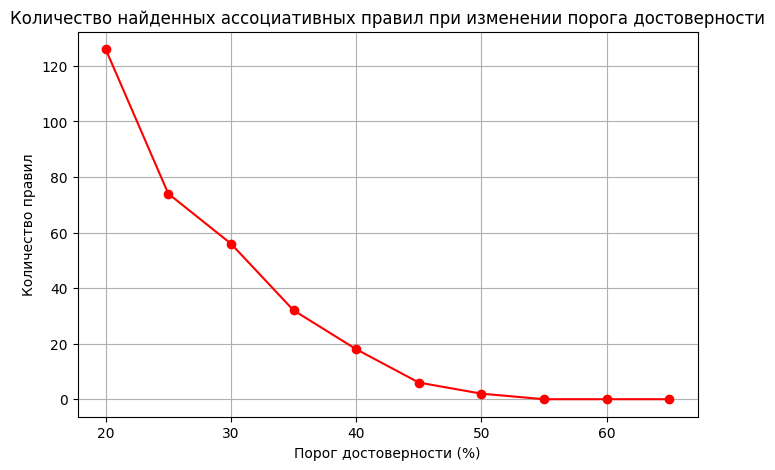

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(confidences, execution_times, marker='o', linestyle='-', color='b')
plt.title("Зависимость быстродействия от порога достоверности")
plt.xlabel("Порог достоверности (%)")
plt.ylabel("Время расчета, сек")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(confidences, rule_counts, marker='o', linestyle='-', color='r')
plt.title("Количество найденных ассоциативных правил при изменении порога достоверности")
plt.xlabel("Порог достоверности (%)")
plt.ylabel("Количество правил")
plt.grid(True)
plt.show()

Выполним отбор и отображение ассоциативных правил, в которых суммарное количество объектов (товаров) в антецеденте и консеквенте не превышает 7.

Переберем все найденные ассоциативные правила, полученные ранее. Для каждого правила извлечем антецедент (исходный набор товаров) и консеквент (набор товаров, который чаще всего приобретается вместе с антецедентом). Если общее количество товаров в этих частях правила не превышает 7, правило добавляется в `selected_rules` вместе с его значениями поддержки и достоверности.

После фильтрации установим ограничение на выводимое количество правил — максимум 10.

Если общее количество найденных правил превышает 10, дополнительно выводится уведомление о том, что показаны только первые 10 правил из общего числа.

In [ ]:
selected_rules = [] # список для отфильтрованных правил
for conf, rules in association_rules:
    for rule in rules:
        for ordered_stat in rule.ordered_statistics:
            antecedent = ', '.join(ordered_stat.items_base) if ordered_stat.items_base else "—"
            consequent = ', '.join(ordered_stat.items_add) if ordered_stat.items_add else "—"
            if len(ordered_stat.items_base) + len(ordered_stat.items_add) <= 7:
                selected_rules.append([antecedent, consequent, rule.support, ordered_stat.confidence])

max_display_count = 10

print(f"\nСписок отфильтрованных правил (до 7 объектов в совокупности), всего {len(selected_rules)} правил:")
print(tabulate(selected_rules[:max_display_count], headers=["Антецедент", "Консеквент", "Поддержка", "Достоверность"], tablefmt="fancy_grid"))

if len(selected_rules) > max_display_count:
    print(f"\nПоказано только первые {max_display_count} правил из {len(selected_rules)}.")



Список отфильтрованных правил (до 7 объектов в совокупности), всего 390 правил:
╒══════════════╤══════════════════╤═════════════╤═════════════════╕
│ Антецедент   │ Консеквент       │   Поддержка │   Достоверность │
╞══════════════╪══════════════════╪═════════════╪═════════════════╡
│ —            │ минеральная вода │   0.238336  │        0.238336 │
├──────────────┼──────────────────┼─────────────┼─────────────────┤
│ авокадо      │ минеральная вода │   0.0115969 │        0.348    │
├──────────────┼──────────────────┼─────────────┼─────────────────┤
│ блинчики     │ картофель-фри    │   0.020128  │        0.211781 │
├──────────────┼──────────────────┼─────────────┼─────────────────┤
│ блинчики     │ макароны         │   0.0255932 │        0.269285 │
├──────────────┼──────────────────┼─────────────┼─────────────────┤
│ блинчики     │ минеральная вода │   0.0337243 │        0.354839 │
├──────────────┼──────────────────┼─────────────┼─────────────────┤
│ блинчики     │ шоколад          │